In [2]:
import matplotlib.pyplot as plt #импортируем библиотеку для рисования
import numpy as np              #импортируем библиотеку для вычислений

In [4]:
t=np.linspace(0,10,1000)   # массив отсчетов времени 0..10c с шагом 0.01с
n = len(t)                 # длина массива
dt = t[1] - t[0]           # шаг по времени
O2_l = np.zeros(n)         # парциальное давление О2 в легких
O2_t = np.zeros(n)         # парциальное давление О2 в теле
K11 = np.zeros(n)          # потребление кислорода мышцами
K15 = 1                    # потребление кислорода неактивными тканями
MOD = 1                    # легочная венитляция
MOK = 1                    # перенос кислорода из легких в тело

# задаем начальные условия
O2_l[0] = 18               
O2_t[0] = 16
K11[100:200] = 10  # два интервала по 1с с нагрузкой
K11[500:600] = 10


# численно решаем уравнения
for i in range(n - 1):
    lung2body = MOK*(O2_l[i] - O2_t[i])
    O2_t_dt = lung2body - K11[i] - K15
    O2_l_dt = MOD*(20 - O2_l[i]) - lung2body
    O2_l[i + 1] =  O2_l[i] + O2_l_dt * dt
    O2_t[i + 1] =  O2_t[i] + O2_t_dt * dt

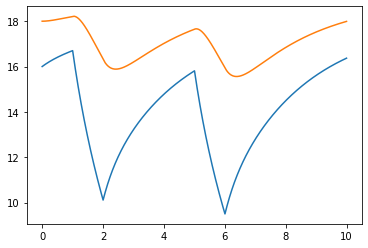

In [5]:
#рисуем графики
plt.plot(t, O2_t)
plt.plot(t, O2_l)
